In [1]:
import numpy as np
from scipy.sparse import csc_matrix
import warnings

from typing import Literal

from scipy.optimize import root_scalar

from sgtsnepi import sgtsne_lambda_equalization

In [2]:
import scipy

D = scipy.io.loadmat(".cluster_only/kNN/SalinasA_A_11.mat")["D"]

P = sgtsne_lambda_equalization(D, 10)

✅ All 7138 elements converged numerically, avg(#iter) = 16.0


In [3]:
scipy.io.savemat("temp_py.mat", {"P": P})

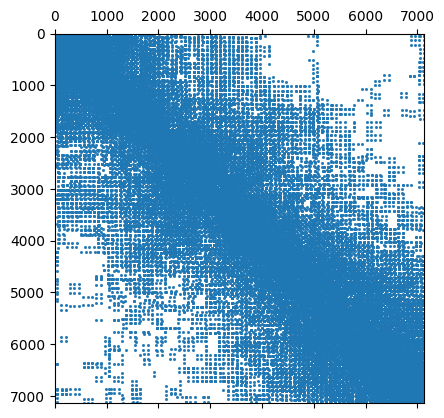

In [4]:
# spy plot the P
import matplotlib.pyplot as plt
plt.spy(P, markersize=1)
plt.show()

Shape: (7138, 7138)
Non-zero elements (nnz): 78518
Sparsity: 0.998459
Max value: 1.000000
Min value: 0.823821
Mean value: 0.909091
Median value: 0.903382


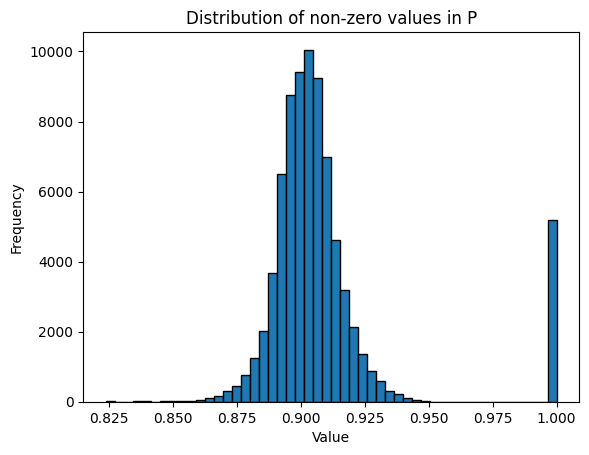

In [5]:
# Print basic properties of P
print(f"Shape: {P.shape}")
print(f"Non-zero elements (nnz): {P.nnz}")
sparsity_py = 1 - (P.nnz / (P.shape[0] * P.shape[1]))
print(f"Sparsity: {sparsity_py:.6f}")
max_val = np.max(P.data)
min_val = np.min(P.data)
print(f"Max value: {max_val:.6f}")
print(f"Min value: {min_val:.6f}")
mean_val = np.mean(P.data)
print(f"Mean value: {mean_val:.6f}")
median_val = np.median(P.data)
print(f"Median value: {median_val:.6f}")
# distribution
plt.hist(P.data, bins=50, edgecolor='black')
plt.title("Distribution of non-zero values in P")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Julia version

```julia
# Calculate sparsity
sparsity_jl = 1 - (nnz(P) / (size(P, 1) * size(P, 2)))
println("Sparsity: ", round(sparsity_jl, digits=6))

# Extract non-zero values
nz_values = nonzeros(P)

# Calculate max and min
max_val = maximum(nz_values)
min_val = minimum(nz_values)
println("Max value: ", round(max_val, digits=6))
println("Min value: ", round(min_val, digits=6))

# Calculate mean and median of non-zero values
mean_val = mean(nz_values)
median_val = median(nz_values)

# Print results
println("Mean value: ", round(mean_val, digits=6))
println("Median value: ", round(median_val, digits=6))

# Plot histogram
histogram(nz_values, bins=50, edgecolor=:black, title="Distribution of non-zero values in P", xlabel="Value", ylabel="Frequency")
```

```output
Sparsity: 0.998459
Max value: 1.0
Min value: 0.823821
Mean value: 0.909091
Median value: 0.903382
```

# ![Figure_1](temp_jl.png)

# ![Figure_2](temp_jlspy.png)
